##Tyriek Thomas

Source: https://data.cityofnewyork.us/City-Government/Revised-Notice-of-Property-Value-RNOPV-/8vgb-zm6e

At the start of each year, the NYC Department of Finance contacts property owners to update them on their properties’ new “Revised Market Value” based on their previous “Original Market Value”, “Original Assessed Value”, and “Original Taxable Value” information that they received from the previous year.

A properties’ “Revised Market Value” can either increase, decrease or remain unchanged based on a number of different economic, tax based, or physical reasons.


In this project I will be using 12 out of the 27 total features provided for optimization.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#step1 import Data Set
url = 'https://drive.google.com/file/d/1h6MQWuoikbjDOFVVV25p1ORrJnK54v6F/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df = df[['Borough','BLD Class','ORIGINAL ASSESSED VALUE', 'REVISED ASSESSED VALUE','ORIGINAL TAXABLE VALUE', 'REVISED TAXABLE VALUE', 'ORIGINAL MARKET VALUE', 'REVISED MARKET VALUE', 'RC 1']]
#df.info()

#pre processing part1 - clean data
#The only  colums we need are CATAGORIES BORO, CUISINE DESCRIPTION AND THE TARGET SCORE
#initdf=df[['Borough','ORIGINAL ASSESSED VALUE','ORIGINAL TAXABLE VALUE', 'ORIGINAL MARKET VALUE', 'REVISED ASSESSED VALUE', 'REVISED MARKET VALUE', 'RC 1']]
#Now we clean the data by droping rows with score of NAN as not useful
#df=df.dropna(axis=0,how='any',subset=['Borough','RC 1']) #if a catagorical is null drop the row
df1=df.dropna(axis=0,how='any',subset=['Borough','RC 1','ORIGINAL MARKET VALUE','REVISED MARKET VALUE'])

df1=df1.fillna(0)
df1.info()


# heatmap1 = df1.corr()
# plt.figure(figsize=(6, 5))
# sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# plt.title('Correlation Heatmap')
# plt.show()

df1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22424 entries, 4 to 27311
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Borough                  22424 non-null  object 
 1   BLD Class                22424 non-null  object 
 2   ORIGINAL ASSESSED VALUE  22424 non-null  float64
 3   REVISED ASSESSED VALUE   22424 non-null  float64
 4   ORIGINAL TAXABLE VALUE   22424 non-null  float64
 5   REVISED TAXABLE VALUE    22424 non-null  float64
 6   ORIGINAL MARKET VALUE    22424 non-null  float64
 7   REVISED MARKET VALUE     22424 non-null  float64
 8   RC 1                     22424 non-null  object 
dtypes: float64(6), object(3)
memory usage: 1.7+ MB


,Borough,BLD Class,ORIGINAL ASSESSED VALUE,REVISED ASSESSED VALUE,ORIGINAL TAXABLE VALUE,REVISED TAXABLE VALUE,ORIGINAL MARKET VALUE,REVISED MARKET VALUE,RC 1
4,MANHATTAN,B2,62520.0,62520.0,56830.0,56830.0,2298000.0,2758000.0,M
7,BROOKLYN,B2,35512.0,35512.0,35512.0,35512.0,650000.0,670000.0,M
8,BROOKLYN,A1,58711.0,58711.0,58711.0,58711.0,1053000.0,1085000.0,M
10,BROOKLYN,A1,51520.0,51520.0,51520.0,51520.0,1116000.0,1150000.0,M
11,BROOKLYN,A1,48469.0,48469.0,48469.0,48469.0,986000.0,1016000.0,M
...,...,...,...,...,...,...,...,...,...
27307,STATEN IS,A1,28365.0,28365.0,26815.0,28365.0,597000.0,597000.0,X
27308,STATEN IS,B2,30816.0,30816.0,9958.0,30816.0,567000.0,567000.0,X
27309,STATEN IS,E9,20293.0,128700.0,20293.0,41055.0,440000.0,286000.0,E1
27310,STATEN IS,A5,18735.0,18735.0,17185.0,18735.0,368000.0,368000.0,X


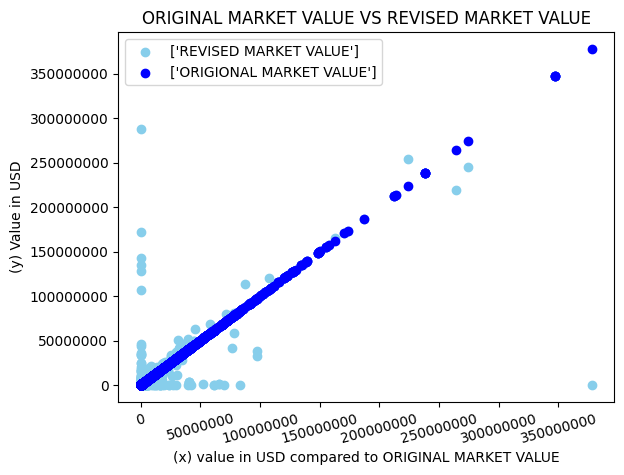

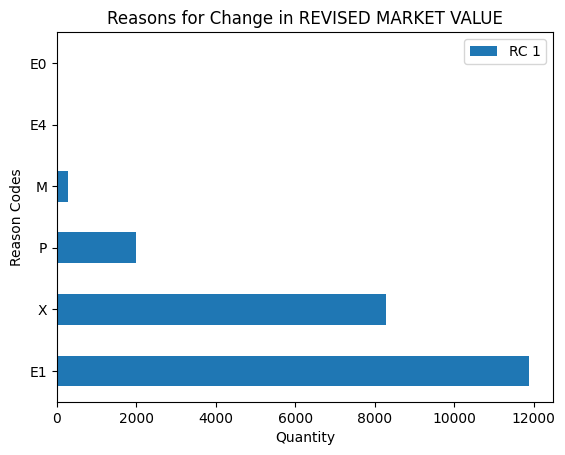

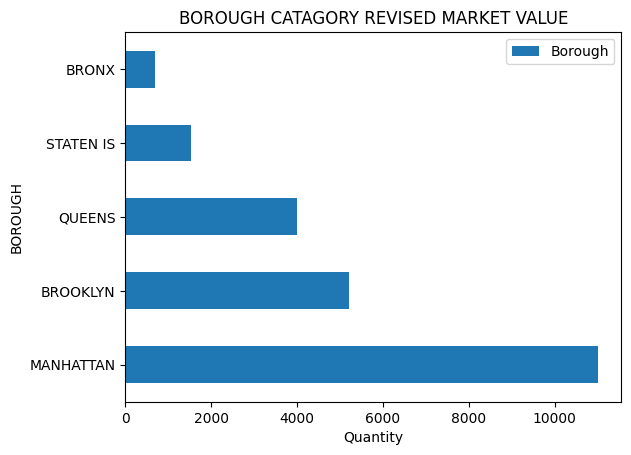

In [ ]:
plt.scatter(df1["ORIGINAL MARKET VALUE"],df1["REVISED MARKET VALUE"], color='skyblue', label=["REVISED MARKET VALUE"])
plt.scatter(df1["ORIGINAL MARKET VALUE"],df1["ORIGINAL MARKET VALUE"], color='blue', label=["ORIGIONAL MARKET VALUE"])

plt.xlabel('(x) value in USD compared to ORIGINAL MARKET VALUE')
plt.ylabel('(y) Value in USD')
plt.ticklabel_format(axis="both",style="plain")
plt.xticks(rotation=15)

plt.title('ORIGINAL MARKET VALUE VS REVISED MARKET VALUE')
plt.legend()
plt.show()

#Because we have the Origional Assesed Taxable and Market values  along with the Revised values I can train my model make an accurate prediction for revised market value
#My model will be even more precise because I used one hot encoding to input the Boro and Reason code into my model

#The reason code Rc 1 is responsible for explaining why there is a change in the origional market value to the new revised market value.
#The reason codes are
# E0 - was fully Sales Exempt now retsored to taxable status
# E1 - Economics
# E4 - Economics (initiated by taxpayer)
# M - MV
# P - Physical Change
# X - Exempt Value Change unless fully
#visualizing the categorical features
#rcodes=df1["RC 1"]
q=df1["RC 1"].value_counts().plot(kind="barh")
#plt.bar(rcodes,height=q, color="orange")
plt.ylabel('Reason Codes')
plt.xlabel('Quantity')
plt.title('Reasons for Change in REVISED MARKET VALUE')
plt.legend()
plt.show()

#print(df1["REVISED MARKET VALUE"][100:150])
#rcodes

q=df1["Borough"].value_counts().plot(kind="barh")
#plt.bar(rcodes,height=q, color="orange")
plt.ylabel('BOROUGH')
plt.xlabel('Quantity')
plt.title('BOROUGH CATAGORY REVISED MARKET VALUE')
plt.legend()
plt.show()

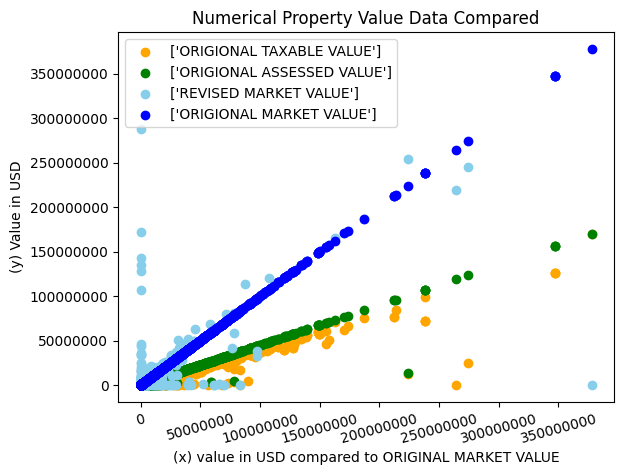

In [ ]:
plt.scatter(df1["ORIGINAL MARKET VALUE"],df1["ORIGINAL TAXABLE VALUE"],color='orange',label=["ORIGIONAL TAXABLE VALUE"])
plt.scatter(df1["ORIGINAL MARKET VALUE"],df1["ORIGINAL ASSESSED VALUE"],color='green',label=["ORIGIONAL ASSESSED VALUE"])
plt.scatter(df1["ORIGINAL MARKET VALUE"],df1["REVISED MARKET VALUE"],color='skyblue',label=["REVISED MARKET VALUE"])
plt.scatter(df1["ORIGINAL MARKET VALUE"],df1["ORIGINAL MARKET VALUE"],color='blue',label=["ORIGIONAL MARKET VALUE"])


plt.xlabel('(x) value in USD compared to ORIGINAL MARKET VALUE')
plt.ylabel('(y) Value in USD')
plt.ticklabel_format(axis="both",style="plain")
plt.xticks(rotation=15)
plt.title('Numerical Property Value Data Compared')
plt.legend()
plt.show()

In [ ]:
#one hot encode catagorical data into numerical column representations
one_hot_encoded = pd.get_dummies(df1, columns=['RC 1','Borough'],prefix=["R","BORO"])
#one_hot_encoded

#///////////////
one_hot_encoded = one_hot_encoded.drop(["BLD Class","REVISED ASSESSED VALUE","REVISED TAXABLE VALUE"],axis=1)
#droped the building class column due to too many catagories (100+)
#including the buiding class may have increased accuracy of model, havever it may have been impractical for one hot encoding into numerical data

# correlations = one_hot_encoded.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# plt.title('Correlation Heatmap')
# plt.show()

one_hot_encoded




,ORIGINAL ASSESSED VALUE,ORIGINAL TAXABLE VALUE,ORIGINAL MARKET VALUE,REVISED MARKET VALUE,R_E0,R_E1,R_E4,R_M,R_P,R_X,BORO_BRONX,BORO_BROOKLYN,BORO_MANHATTAN,BORO_QUEENS,BORO_STATEN IS
4,62520.0,56830.0,2298000.0,2758000.0,0,0,0,1,0,0,0,0,1,0,0
7,35512.0,35512.0,650000.0,670000.0,0,0,0,1,0,0,0,1,0,0,0
8,58711.0,58711.0,1053000.0,1085000.0,0,0,0,1,0,0,0,1,0,0,0
10,51520.0,51520.0,1116000.0,1150000.0,0,0,0,1,0,0,0,1,0,0,0
11,48469.0,48469.0,986000.0,1016000.0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27307,28365.0,26815.0,597000.0,597000.0,0,0,0,0,0,1,0,0,0,0,1
27308,30816.0,9958.0,567000.0,567000.0,0,0,0,0,0,1,0,0,0,0,1
27309,20293.0,20293.0,440000.0,286000.0,0,1,0,0,0,0,0,0,0,0,1
27310,18735.0,17185.0,368000.0,368000.0,0,0,0,0,0,1,0,0,0,0,1


 The data is preprocessed
### Now it is time to train and test the data for our selected Target


count    2.242400e+04
mean     3.020711e+06
std      1.271148e+07
min      0.000000e+00
25%      2.441090e+05
50%      4.430000e+05
75%      8.520000e+05
max      3.474240e+08
Name: REVISED MARKET VALUE, dtype: float64
max=347,000,000
mean=3,020,000,median=443,000


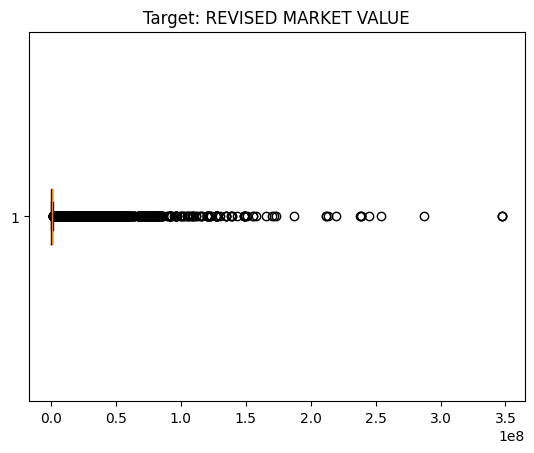

4        2758000.0
7         670000.0
8        1085000.0
10       1150000.0
11       1016000.0
           ...    
27307     597000.0
27308     567000.0
27309     286000.0
27310     368000.0
27311     235000.0
Name: REVISED MARKET VALUE, Length: 22424, dtype: float64

In [ ]:
#Select a target
#For this dataset The target we want to predict is the Revised MArket Value
#targetcol="REVISED MARKET VALUE"
targetcol="REVISED MARKET VALUE"
print(one_hot_encoded[targetcol].describe())
print("max=347,000,000\nmean=3,020,000,median=443,000")
plt.boxplot(one_hot_encoded[targetcol],vert=False,)

plt.title("Target: REVISED MARKET VALUE")
plt.show()

y = one_hot_encoded[targetcol];#we want to predict the Revised Market Value
X = one_hot_encoded.drop(targetcol, axis=1)
y

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model=LinearRegression();
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

#r2 score
r2=r2_score(y_test,y_pred)
print("r2: " + str(r2) )
print("intercept_ " + str(model.intercept_) )
print("coef_ " + str(model.coef_) )

#root mean squared error
rootmse = mean_squared_error(y_test, y_pred, squared=False)
print('root mean squared error:'+str(rootmse))
X


r2: 0.9328671776570595
intercept_ -114309.48016348993
coef_ [ 1.12130668e-01 -6.03417446e-01  1.09760699e+00  3.55390710e+05
 -1.29082001e+05 -4.27141665e+05 -4.99145197e+03 -2.67310078e+05
  4.73134486e+05 -2.27100273e+05  7.44974794e+04  5.16848412e+05
 -1.32277879e+05 -2.31967740e+05]
root mean squared error:3047891.8278787048


,ORIGINAL ASSESSED VALUE,ORIGINAL TAXABLE VALUE,ORIGINAL MARKET VALUE,R_E0,R_E1,R_E4,R_M,R_P,R_X,BORO_BRONX,BORO_BROOKLYN,BORO_MANHATTAN,BORO_QUEENS,BORO_STATEN IS
4,62520.0,56830.0,2298000.0,0,0,0,1,0,0,0,0,1,0,0
7,35512.0,35512.0,650000.0,0,0,0,1,0,0,0,1,0,0,0
8,58711.0,58711.0,1053000.0,0,0,0,1,0,0,0,1,0,0,0
10,51520.0,51520.0,1116000.0,0,0,0,1,0,0,0,1,0,0,0
11,48469.0,48469.0,986000.0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27307,28365.0,26815.0,597000.0,0,0,0,0,0,1,0,0,0,0,1
27308,30816.0,9958.0,567000.0,0,0,0,0,0,1,0,0,0,0,1
27309,20293.0,20293.0,440000.0,0,1,0,0,0,0,0,0,0,0,1
27310,18735.0,17185.0,368000.0,0,0,0,0,0,1,0,0,0,0,1


Now that the Multiple Linear Regression Model is Trained we can begin to visualize the test and predicted values

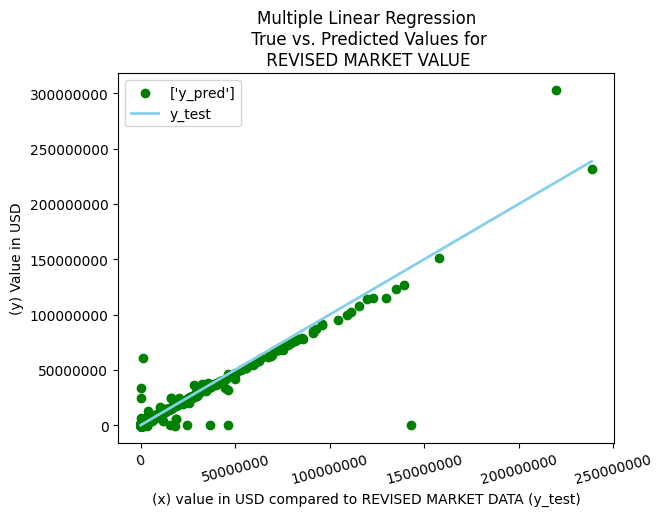

In [ ]:
plt.scatter(y_test,y_pred, color='green', label=["y_pred"])
#plt.plot(y_test,y_pred, color='green', label=["y_pred"])
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', linewidth=2, color='skyblue', label='y_test')


plt.xlabel('(x) value in USD compared to REVISED MARKET DATA (y_test)')
plt.ylabel('(y) Value in USD')
plt.ticklabel_format(axis="both",style="plain")
plt.xticks(rotation=15)
plt.title('Multiple Linear Regression\n True vs. Predicted Values for\n REVISED MARKET VALUE')
plt.legend()
plt.show()

Lets make a prediction or 2

In [ ]:
px= pd.DataFrame({"ORIGINAL ASSESSED VALUE":[300000],"ORIGINAL TAXABLE VALUE":[300000],"ORIGINAL MARKET VALUE":[800000], "R_E0":[0], "R_E1":[1], "R_E4":[0], "R_M":[0], "R_P":[0], "R_X":[0], "BORO_BRONX":[0],"BORO_BROOKLYN":[0],"BORO_MANHATTAN":[1],"BORO_QUEENS":[0],"BORO_STATEN IS":[0] })
py= pd.DataFrame({"ORIGINAL ASSESSED VALUE":[300000],"ORIGINAL TAXABLE VALUE":[300000],"ORIGINAL MARKET VALUE":[800000], "R_E0":[0], "R_E1":[0], "R_E4":[0], "R_M":[0], "R_P":[0], "R_X":[1], "BORO_BRONX":[0],"BORO_BROOKLYN":[0],"BORO_MANHATTAN":[1],"BORO_QUEENS":[0],"BORO_STATEN IS":[0] })
pred1=model.predict(px)
print(pred1)

pred2=model.predict(py)
print(pred2)

[1004156.48814242]
[1606372.97454851]
